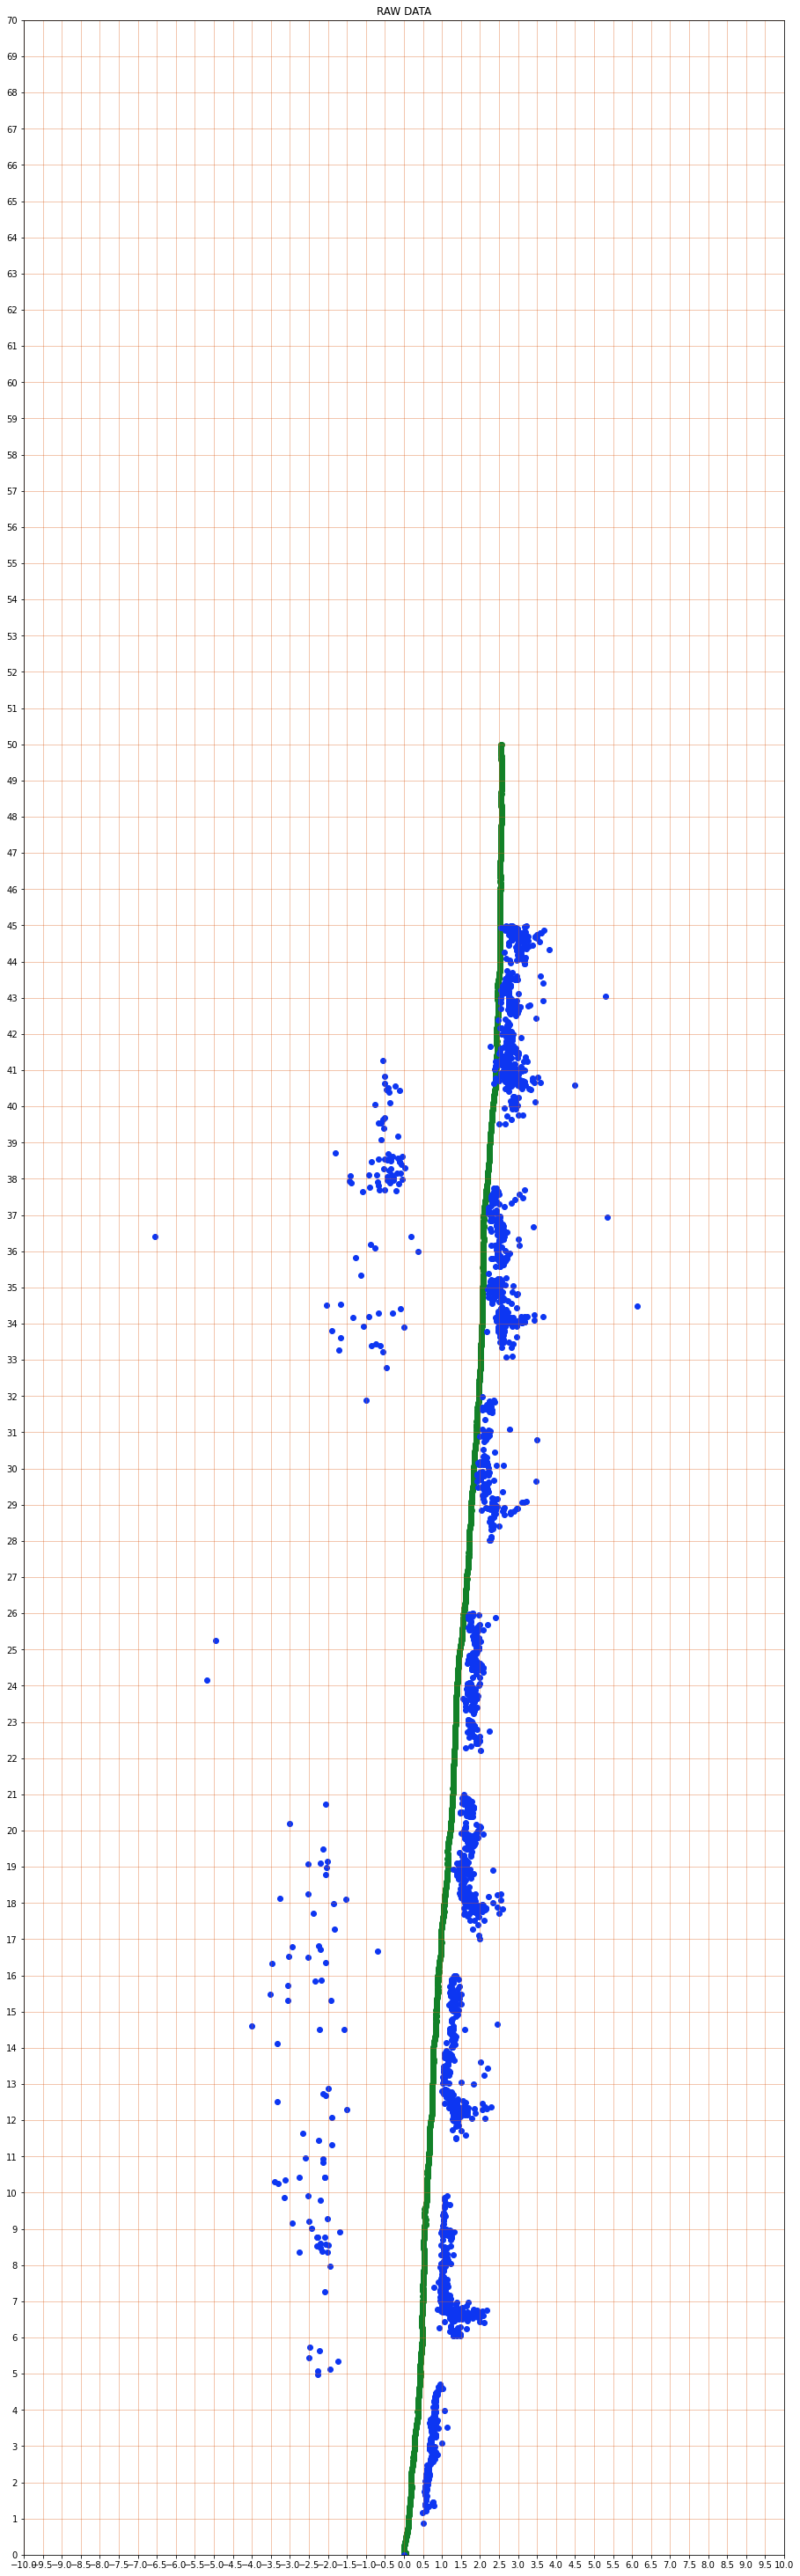

168
168
2701
2701


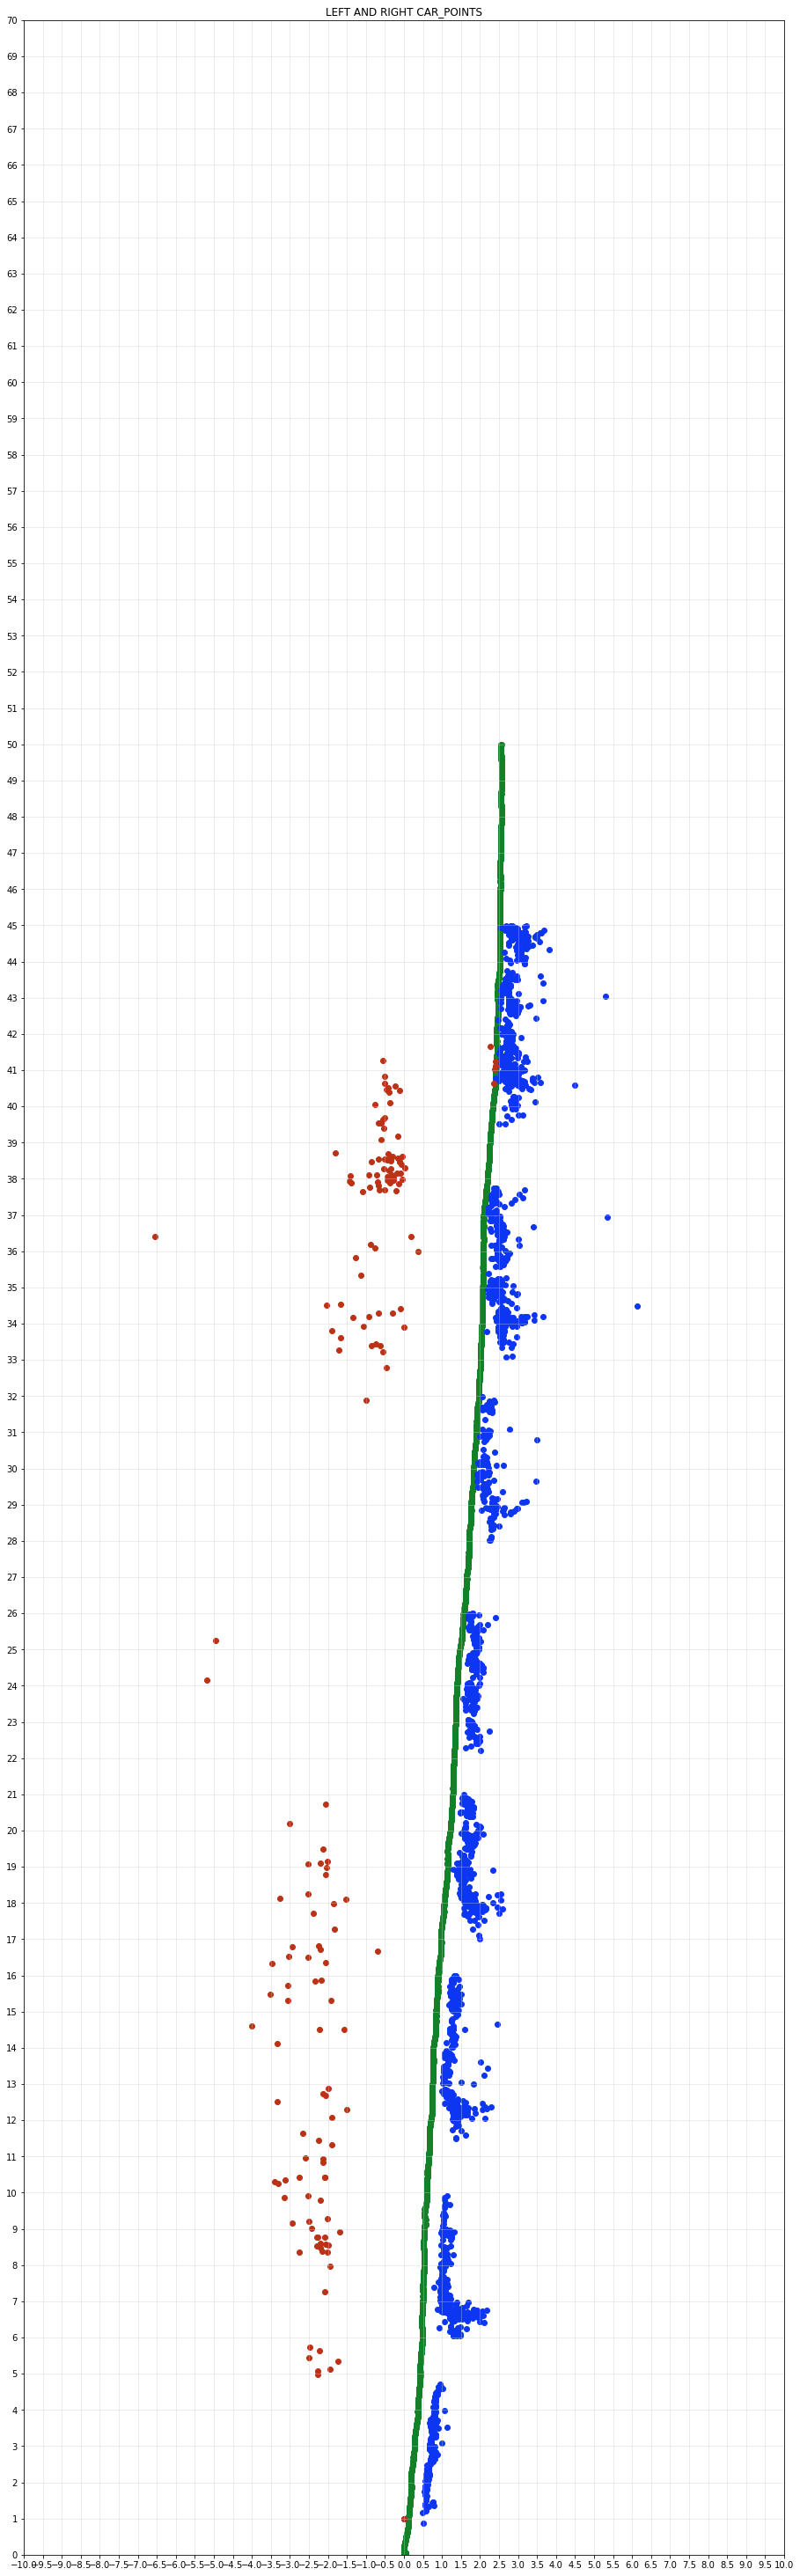

Counter({7: 584, 6: 441, 1: 368, 3: 317, 2: 312, 4: 282, 0: 229, 5: 166, -1: 3})
Number of clusters = 9
Counter({3: 58, -1: 47, 0: 33, 2: 17, 1: 14})
Number of clusters = 5


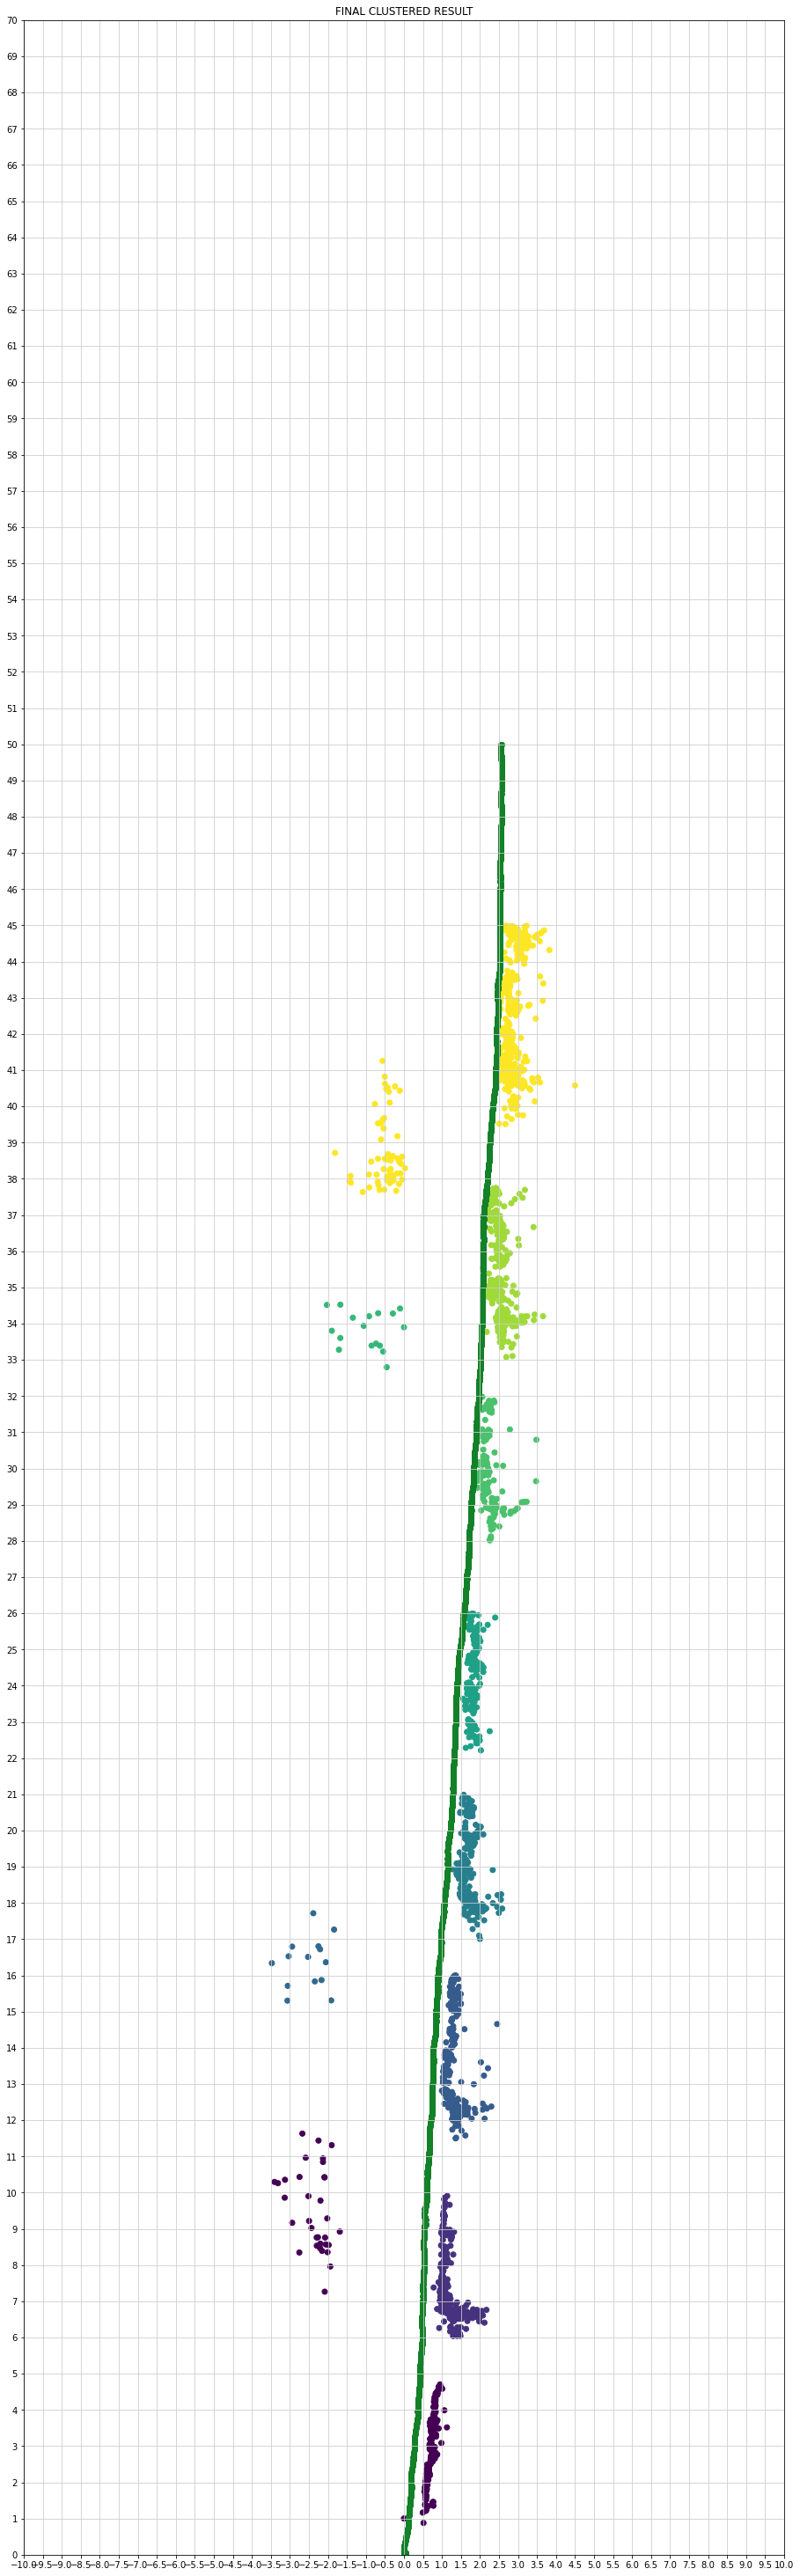

In [15]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy
from pylab import rcParams
rcParams['figure.figsize'] =14, 6
%matplotlib inline

#Extracting data from file
dataset = 12 #dataset number

#path for ubuntu
#car_path = "/home/lzr/notebook/car_detection/csv_files/Processed_Data/%d/CAR_POINTS/RAW_CAR_POINTS/CAR_POINTS.csv"  %dataset
#trajectory_path = "/home/lzr/notebook/car_detection/csv_files/Processed_Data/%d/map/%d_TRAJECTORY.csv" %(dataset, dataset)
#road_path = "/home/lzr/notebook/car_detection/csv_files/%d/ROAD_POINTS.csv" %dataset
#sidewalk_path = "/home/lzr/notebook/car_detection/csv_files/%d/SIDEWALK_POINTS.csv" %dataset

#path for windows
trajectory_path = "C:/users/ME/documents/DBSCAN_with_datasets/%d/map/%d_TRAJECTORY.csv" %(dataset, dataset)
road_path = "C:/users/ME/documents/DBSCAN_with_datasets/%d/ROAD_POINTS/ROAD_POINTS.csv" %dataset
sidewalk_path = "C:/users/ME/documents/DBSCAN_with_datasets/%d/SIDEWALK_POINTS/SIDEWALK_POINTS.csv" %dataset
car_path = "C:/users/ME/documents/DBSCAN_with_datasets/%d/CAR_POINTS/RAW_CAR_POINTS/CAR_POINTS.csv" %dataset

trajectory = pd.read_csv(trajectory_path, sep=',', header=None)
#road = pd.read_csv(road_path, sep=',', header=None)
#sidewalk = pd.read_csv(sidewalk_path, sep=',', header=None)
car = pd.read_csv(car_path, sep=',', header=None)
car

trajectory = trajectory.drop([1], axis=1)
trajectory.head()

#road = road.drop([1], axis=1)
#road.head()

#sidewalk = sidewalk.drop([1], axis=1)
#sidewalk.head()

car = car.drop([0], axis=1)
car.head()

#Just plotting data
# fig = plt.figure()

# ax = fig.add_axes([.1, .1, 2, 10])

# ax.scatter(trajectory[0], trajectory[2], c='#128128')  #green
# #ax.scatter(road[0], road[2], c='#080200') #black
# #ax.scatter(sidewalk[0], sidewalk[2], c='#ee09e3') #pink
# ax.scatter(car[1], car[2], c='#0d36f2')  #blue


# plt.title('Final Result')
# plt.grid(which='major', color='#db6120', alpha=0.45)
# plt.xlim([-10, 10])
# plt.xticks([10.0, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5, 
#            -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5, -5.0, -5.5, -6.0, -6.5, -7.0, -7.5, -8.0, -8.5, -9.0, -9.5, -10.0])
# plt.ylim([0, 70])
# plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
#           41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
# plt.show()


#dividing road into left and right

#setting trajectory
trajectory_x = trajectory[0]
trajectory_x = trajectory_x.values.astype('float32', copy=False)

trajectory_y = trajectory[2]
trajectory_y = trajectory_y.values.astype('float32', copy=False)

car_x = car[1]
car_x = car_x.values.astype('float32', copy=False)

car_y = car[2]
car_y = car_y.values.astype('float32', copy=False)

#road_x = road[0]
#road_x = road_x.values.astype('float32', copy=False)

#road_y = road[2]
#road_y = road_y.values.astype('float32', copy=False)

#sidewalk_x = sidewalk[0]
#sidewalk_x = sidewalk_x.values.astype('float32', copy=False)

#sidewalk_y = sidewalk[2]
#sidewalk_y = sidewalk_y.values.astype('float32', copy=False)

#stopping at 50m
trajectory_x_plot = []
trajectory_x_plot = [0 for i in range(len(trajectory_x))]  
trajectory_y_plot = []
trajectory_y_plot = [0 for i in range(len(trajectory_y))]

car_x_plot = []
car_x_plot = [0 for i in range(len(car_x))]  
car_y_plot = []
car_y_plot = [0 for i in range(len(car_y))]

#road_x_plot = []
#road_x_plot = [0 for i in range(len(road_x))]  
#road_y_plot = []
#road_y_plot = [0 for i in range(len(road_y))] 

#sidewalk_x_plot = []
#sidewalk_x_plot = [0 for i in range(len(sidewalk_x))]  
#sidewalk_y_plot = []
#sidewalk_y_plot = [0 for i in range(len(sidewalk_y))] 

for a in range(len(trajectory_y)):
    if trajectory_y[a] < 50.0:
        trajectory_x_plot[a] = trajectory_x[a]
        trajectory_y_plot[a] = trajectory_y[a]
        #print(trajectory_x_plot[a], "    ", trajectory_y_plot[a])
        
for a in range(len(car_y)):
    if car_y[a] < 50.0:
        car_x_plot[a] = car_x[a]
        car_y_plot[a] = car_y[a]
        #print(trajectory_x_plot[a], "    ", trajectory_y_plot[a])
        
#for a in range(len(road_y)):
#    if road_y[a] < 50.0:
 #       road_x_plot[a] = road_x[a]
 #       road_y_plot[a] = road_y[a]
 #       #print(trajectory_x_plot[a], "    ", trajectory_y_plot[a])
        
#for a in range(len(sidewalk_y)):
#    if sidewalk_y[a] < 50.0:
#        sidewalk_x_plot[a] = sidewalk_x[a]
 #       sidewalk_y_plot[a] = sidewalk_y[a]
 #       #print(trajectory_x_plot[a], "    ", trajectory_y_plot[a])


#plotting data till 50m
fig = plt.figure()

ax = fig.add_axes([.1, .1, 2, 10])

ax.scatter(trajectory_x_plot, trajectory_y_plot, c='#128128')  #green
ax.scatter(car_x_plot, car_y_plot, c='#0d36f2') #blue
#ax.scatter(road_x_plot, road_y_plot, c='#080200') #black
#ax.scatter(sidewalk_x_plot, sidewalk_y_plot, c='#ee09e3') #pink

plt.title('RAW DATA')
plt.grid(which='major', color='#db6120', alpha=0.45)
plt.xlim([-10, 10])
plt.xticks([10.0, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5, 
            -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5, -5.0, -5.5, -6.0, -6.5, -7.0, -7.5, -8.0, -8.5, -9.0, -9.5, -10.0])
plt.ylim([0, 70])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
           41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
plt.show()

#extracting left and right side  car data
car_x_pos = []
car_x_pos = [0 for i in range(100*len(car_x))]  
car_y_pos = []
car_y_pos = [0 for i in range(100*len(car_x))] 

car_x_neg = []
car_x_neg = [0 for i in range(100*len(car_y))]  
car_y_neg = []
car_y_neg = [0 for i in range(100*len(car_y))] 


c = 1.0
max = 50.0
i = 0

while c <= max:
    #sum of trajectory_x_plot having trajectory_y_plot <= 1
    summ = 0.0
    count = 0
    for a in range(len(trajectory_y_plot)):
        if trajectory_y_plot[a] > c-1.0 and trajectory_y_plot[a] <= c:
            summ = summ + trajectory_x_plot[a]
            count = count + 1
    average = summ / count
    average = round(average,3)
    #print(average)
    
    
    for b in range(len(car_y)):
        if car_y[b] > c-1.0 and car_y[b] <= c:
            if car_x[b] > average:
                car_x_pos[i] = car_x[b]
                car_y_pos[i] = car_y[b]
                #i = i + 1
            if car_x[b] < average:
                car_x_neg[i] = car_x[b]
                car_y_neg[i] = car_y[b]

            i = i + 1
        #print(i)
    c = c + 1.0

# plotting left and right side car data
# fig = plt.figure()

# ax = fig.add_axes([.1, .1, 2, 10])

# ax.scatter(car_x_pos, car_y_pos, c='#0d36f2') #blue
# ax.scatter(car_x_neg, car_y_neg, c='#bb3215') #red
# ax.scatter(trajectory_x_plot, trajectory_y_plot, c='#128128')  #green

# plt.title('Final Result')
# plt.grid(which='major', color='#cccccc', alpha=0.45)
# plt.xlim([-10, 10])
# plt.xticks([10.0, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5, 
#            -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5, -5.0, -5.5, -6.0, -6.5, -7.0, -7.5, -8.0, -8.5, -9.0, -9.5, -10.0])
# plt.ylim([0, 70])
# plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
#           41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
# plt.show()

#removing zeros from the array
car_x_neg = [i for i in car_x_neg if i != 0]
print(len(car_x_neg))
car_y_neg = [i for i in car_y_neg if i != 0]
print(len(car_y_neg))

car_x_pos = [i for i in car_x_pos if i != 0]
print(len(car_x_pos))
car_y_pos = [i for i in car_y_pos if i != 0]
print(len(car_y_pos))

#saving left and right car points in csv file
#path1 = "/home/lzr/notebook/car_detection/csv_files/Processed_Data/%d/CAR_POINTS/RIGHT_SIDE_CAR_POINTS/RIGHT_POINTS/%d_pos.csv" %(dataset,dataset)
#path2 = "/home/lzr/notebook/car_detection/csv_files/Processed_Data/%d/CAR_POINTS/LEFT_SIDE_CAR_POINTS/LEFT_POINTS/%d_neg.csv" %(dataset,dataset)
path1 = "C:/users/ME/documents/DBSCAN_with_datasets/%d/CAR_POINTS/RIGHT_SIDE_CAR_POINTS/RIGHT_POINTS/%d_pos.csv" %(dataset,dataset)
path2 = "C:/users/ME/documents/DBSCAN_with_datasets/%d/CAR_POINTS/LEFT_SIDE_CAR_POINTS/LEFT_POINTS/%d_neg.csv" %(dataset,dataset)
car_pos = np.dstack((car_x_pos, car_y_pos))
df = pd.DataFrame(car_pos[0])
df.to_csv(path1)
car_neg = np.dstack((car_x_neg, car_y_neg))
df = pd.DataFrame(car_neg[0])
df.to_csv(path2)

pos_path = pd.read_csv(path1, sep=',', header=None)
pos_path = pos_path.drop([0], axis=1)
neg_path = pd.read_csv(path2, sep=',', header=None)
neg_path = neg_path.drop([0], axis=1)

pos_path.head()

neg_path.head()

#Just plotting data
fig = plt.figure()

ax = fig.add_axes([.1, .1, 2, 10])


ax.scatter(trajectory_x_plot, trajectory_y_plot, c='#128128')
ax.scatter(pos_path[1], pos_path[2], c='#0d36f2')
ax.scatter(neg_path[1], neg_path[2], c='#bb3215')

plt.title('LEFT AND RIGHT CAR_POINTS')
plt.grid(which='major', color='#cccccc', alpha=0.45)
plt.xlim([-10, 10])
plt.xticks([10.0, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5, 
            -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5, -5.0, -5.5, -6.0, -6.5, -7.0, -7.5, -8.0, -8.5, -9.0, -9.5, -10.0])
plt.ylim([0, 70])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
           41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
plt.show()

#DBSCAN on left cars data

#Applying algorithm
#You can change the eps and min_samples for your required result.
#You can also adjust parameters by having a look on this presentation.
db_data2 = neg_path
db_data2 = db_data2.values.astype('float32', copy=False)
"https://docs.google.com/presentation/d/1Jq7_5B-KIHTo5rA2HGI-kT5WOc8beL_6-7kzXWN40B0/edit?usp=sharing"
model2 = DBSCAN(eps=1.0, min_samples=10, metric='euclidean').fit(db_data2)
model2

#DBSCAN on right cars data

#Applying algorithm
#You can change the eps and min_samples for your required result.
#You can also adjust parameters by having a look on this presentation.
db_data1 = pos_path
db_data1 = db_data1.values.astype('float32', copy=False)
"https://docs.google.com/presentation/d/1Jq7_5B-KIHTo5rA2HGI-kT5WOc8beL_6-7kzXWN40B0/edit?usp=sharing"
model1 = DBSCAN(eps=1, min_samples=10, metric='euclidean').fit(db_data1)
model1

#right clusters
outlier1 = pos_path[model1.labels_ == -1]
cluster_pos = pos_path[model1.labels_ != -1]

colors1 = model1.labels_
colors_cluster_pos = colors1[colors1 != -1]
color_outlier1 = 'black'

clusters = Counter(model1.labels_)
print(clusters)
print('Number of clusters = {}'.format(len(clusters)))


#left_clusters
outlier2 = neg_path[model2.labels_ == -1]
cluster_neg = neg_path[model2.labels_ != -1]

colors2 = model2.labels_
colors_cluster = colors2[colors2 != -1]
color_outlier2 = 'black'

clusters = Counter(model2.labels_)
print(clusters)
print('Number of clusters = {}'.format(len(clusters)))

#Plotting data. Each cluster has different color.
fig = plt.figure()

ax = fig.add_axes([.1, .1, 2, 10])

ax.scatter(cluster_pos[1], cluster_pos[2], c=colors_cluster_pos)
ax.scatter(cluster_neg[1], cluster_neg[2], c=colors_cluster)
ax.scatter(trajectory_x_plot,  trajectory_y_plot, c='#128128')

plt.title('FINAL CLUSTERED RESULT')
plt.grid(which='major', color='#cccccc', alpha=1)
plt.xlim([-10, 10])
plt.xticks([10.0, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5, 
            -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5, -5.0, -5.5, -6.0, -6.5, -7.0, -7.5, -8.0, -8.5, -9.0, -9.5, -10.0])
plt.ylim([0, 70])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
           41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
plt.show()